In [1]:
# Data Processing Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # to set the background style of plots
import datetime
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Model Building Tools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# Loading the data
df = pd.read_csv("loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# LOading the test data
test_df = pd.read_csv("loan-test.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# Checking the shape of the data
df.shape

(614, 13)

In [5]:
test_df.shape

(367, 12)

In [6]:
# Inspecting the data types of the variables
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dependents column would have been converted to an integer (int) if it did not contain 3+

In [7]:
#to change the column names to lower case and make the loan_id the index
df.columns = [x.lower() for x in df.columns]
df.set_index("loan_id", inplace = True)
test_df.columns = [x.lower() for x in test_df.columns]
test_df.set_index("loan_id", inplace = True)
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [8]:
# to display the summary statistics of numerical columns
df.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Cleaning

In [9]:
# checking for duplicates in the data
df.duplicated().sum()

0

In [10]:
#checking for null values
df.isna().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [11]:
# Getting 10 random samples
df.sample(10)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
loan_id,,,,,,,,,,,,
LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y
LP001507,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,Y
LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
LP002226,Male,Yes,0,Graduate,NaN,3333,2500.0,128.0,360.0,1.0,Semiurban,Y
LP002723,Male,No,2,Graduate,No,3588,0.0,110.0,360.0,0.0,Rural,N
LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N
LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N


In [12]:
# Getting all the columns with null values
num_null = list(df.loc[:, df.isnull().sum() !=0].columns)
num_null

['gender',
 'married',
 'dependents',
 'self_employed',
 'loanamount',
 'loan_amount_term',
 'credit_history']

In [13]:
[df[x].fillna(df[x].mode()[0], inplace = True) for x in num_null[:4]]

[None, None, None, None]

In [14]:
# I used the median because it is less affected by outliers compared to the mean
df['loanamount'].fillna(df.loanamount.median(), inplace = True)

In [15]:
df[['loan_amount_term', 'credit_history']] = df[['loan_amount_term', 'credit_history']].fillna(method = 'ffill')

I used the fill forward method because it considers entries that are close to the missing data and it will improve the normalization of the data

In [16]:
# Inspecting the missing values again
df.isna().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [17]:
df.education.value_counts()

Graduate        480
Not Graduate    134
Name: education, dtype: int64

## Cleaning the Test Data

In [18]:
test_df.duplicated().sum()

1

In [19]:
# Dropping the duplicate
test_df.drop_duplicates(inplace = True)

In [20]:
test_df.isna().sum()

gender               11
married               0
dependents           10
education             0
self_employed        23
applicantincome       0
coapplicantincome     0
loanamount            5
loan_amount_term      6
credit_history       29
property_area         0
dtype: int64

In [21]:
test_null = list(test_df.loc[:, test_df.isnull().sum() !=0].columns)
test_null

['gender',
 'dependents',
 'self_employed',
 'loanamount',
 'loan_amount_term',
 'credit_history']

In [22]:
[test_df[x].fillna(test_df[x].mode()[0], inplace = True) for x in test_null[:3]]

[None, None, None]

In [23]:
test_df['loanamount'].fillna(test_df.loanamount.median(), inplace = True)

In [24]:
test_df[['loan_amount_term', 'credit_history']] = test_df[['loan_amount_term', 'credit_history']].fillna(method = 'ffill')

In [25]:
test_df.isna().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
dtype: int64

# Exploratory Data Analysis

In [26]:
# Loan status by gender
loan_status_by_gender = pd.crosstab(df.gender, df.loan_status)
loan_status_by_gender

loan_status,N,Y
gender,,
Female,37,75
Male,155,347


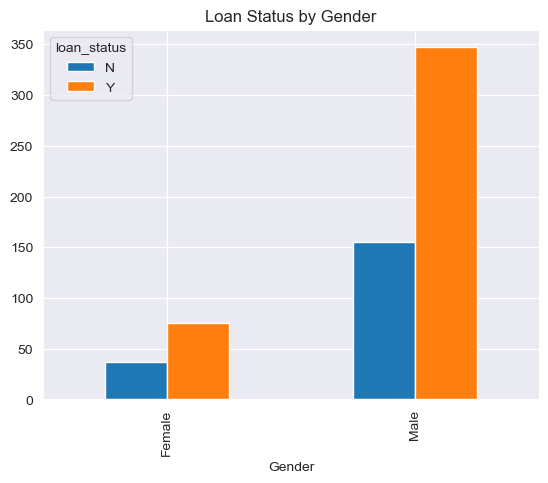

In [27]:
loan_status_by_gender.plot(kind = 'bar')
plt.xlabel("Gender")
plt.title("Loan Status by Gender")
plt.show()

In [28]:
loan_status_by_marital_status = pd.crosstab(df.married, df.loan_status)
loan_status_by_marital_status

loan_status,N,Y
married,,
No,79,134
Yes,113,288


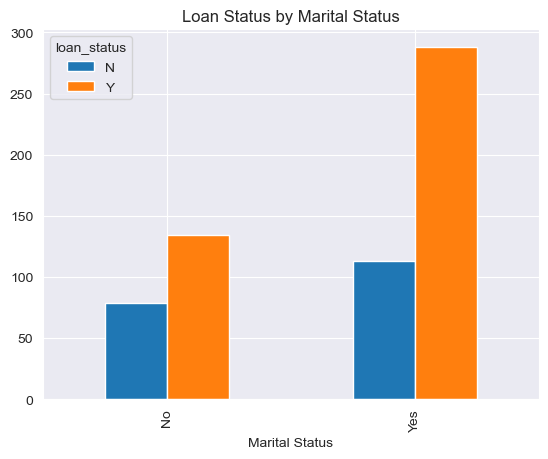

In [29]:
loan_status_by_marital_status.plot(kind = 'bar')
plt.xlabel("Marital Status")
plt.title("Loan Status by Marital Status")
plt.show()

In [30]:
loan_status_by_education = pd.crosstab(df.education, df.loan_status)
loan_status_by_education

loan_status,N,Y
education,,
Graduate,140,340
Not Graduate,52,82


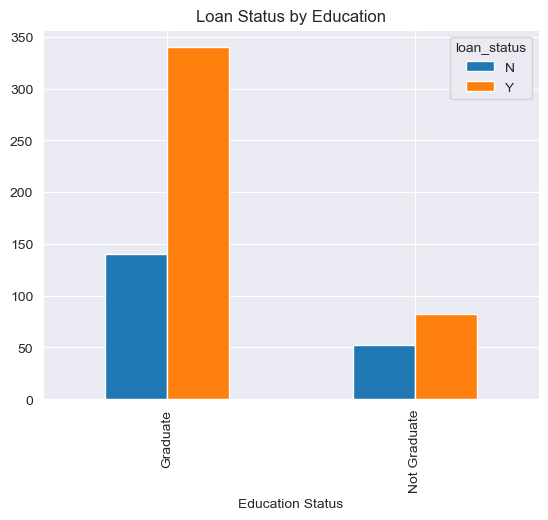

In [31]:
loan_status_by_education.plot(kind = 'bar')
plt.xlabel("Education Status")
plt.title("Loan Status by Education")
plt.show()

In [32]:
#Checking the correlation between applicants' incomes and the loan amount
df.applicantincome.corr(df.loanamount)

0.5651805176233125

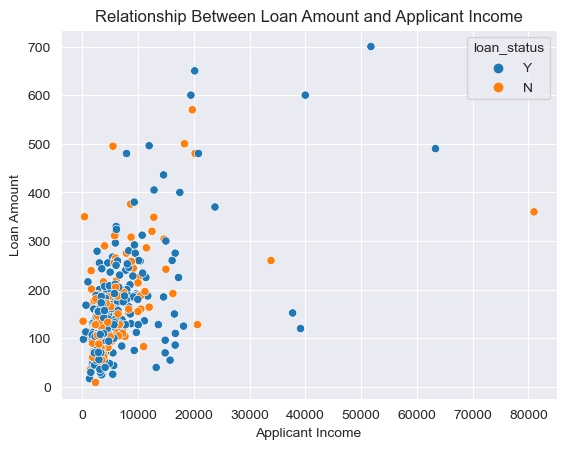

In [33]:
sns.scatterplot(x= 'applicantincome', y = 'loanamount', data = df, hue = 'loan_status')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Relationship Between Loan Amount and Applicant Income")
plt.show()

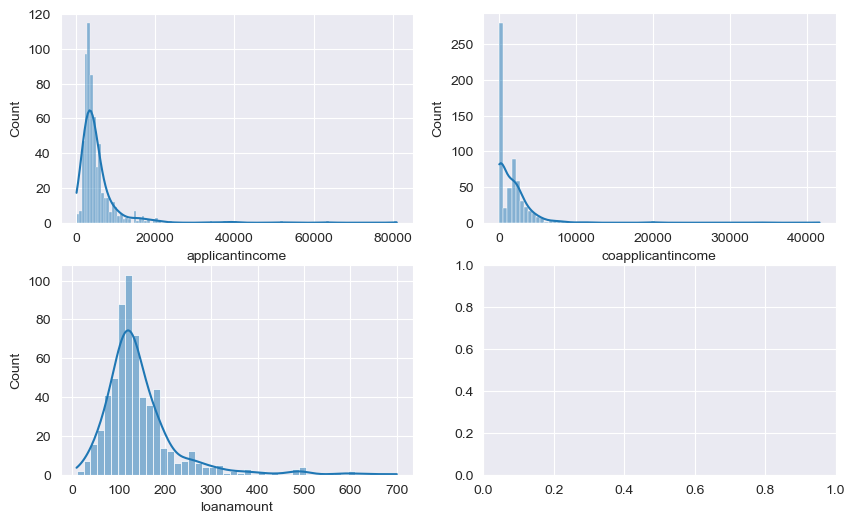

In [34]:
# Visualizing the distribution
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(data=df, x = 'applicantincome', kde=True, ax=axs[0, 0])
sns.histplot(data=df,  x = 'coapplicantincome', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x = 'loanamount', kde=True, ax=axs[1, 0])
plt.show()

The above shows that the variables are right skewed, hence there is a need normalize them by to log-transforming them 

In [35]:
# Normalizing the train data
np.seterr(divide = 'ignore') # to avoid some warnings on processes that have no impact on the code
df.applicantincome = np.log(df.applicantincome)
df.coapplicantincome =  np.log(df.coapplicantincome)
df.loanamount = np.log(df.loanamount)

In [36]:
# Normalizing the above variables in the test data
test_df.applicantincome = np.log(test_df.applicantincome)
test_df.coapplicantincome = np.log(test_df.coapplicantincome)
test_df.loanamount = np.log(test_df.loanamount)

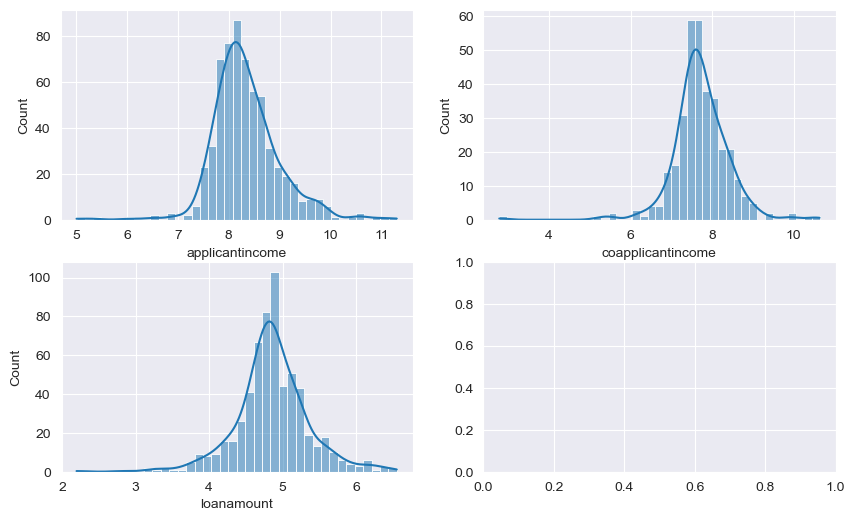

In [37]:
# Visualizing the distribution again

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(data=df, x = 'applicantincome', kde=True, ax=axs[0, 0])
sns.histplot(data=df,  x = 'coapplicantincome', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x = 'loanamount', kde=True, ax=axs[1, 0])
plt.show()

The coapplicantincome plot still appears left skewed, this is due to 273 entries being 0, the test coapplicantincome also has 175 0 values, hence these columns will not form part of the features used for the model.

### Changing Boolean type columns to numbers

In [38]:
df.loan_status = df.loan_status.replace({"Y": 1, "N" : 0})

df.gender = df.gender.replace({"Male": 1, "Female" : 0})
test_df.gender = test_df.gender.replace({"Male": 1, "Female" : 0})

df.married = df.married.replace({"Yes": 1, "No" : 0})
test_df.married = test_df.married.replace({"Yes": 1, "No" : 0})

df.education = df.education.replace({"Graduate": 1, "Not Graduate": 0})
test_df.education = test_df.education.replace({"Graduate": 1, "Not Graduate": 0})

df.self_employed = df.self_employed.replace({"Yes": 1, "No" : 0})
test_df.self_employed = test_df.self_employed.replace({"Yes": 1, "No" : 0})

In [39]:
# I used label encoder for property area and dependents beacuase they have more than 2 values
from sklearn.preprocessing import LabelEncoder
feature_col = ['property_area', 'dependents']
le = LabelEncoder()
for col in feature_col:
    df[col] = le.fit_transform(df[col])
    test_df[col] = le.fit_transform(test_df[col])

All the columns are now in numerical forms

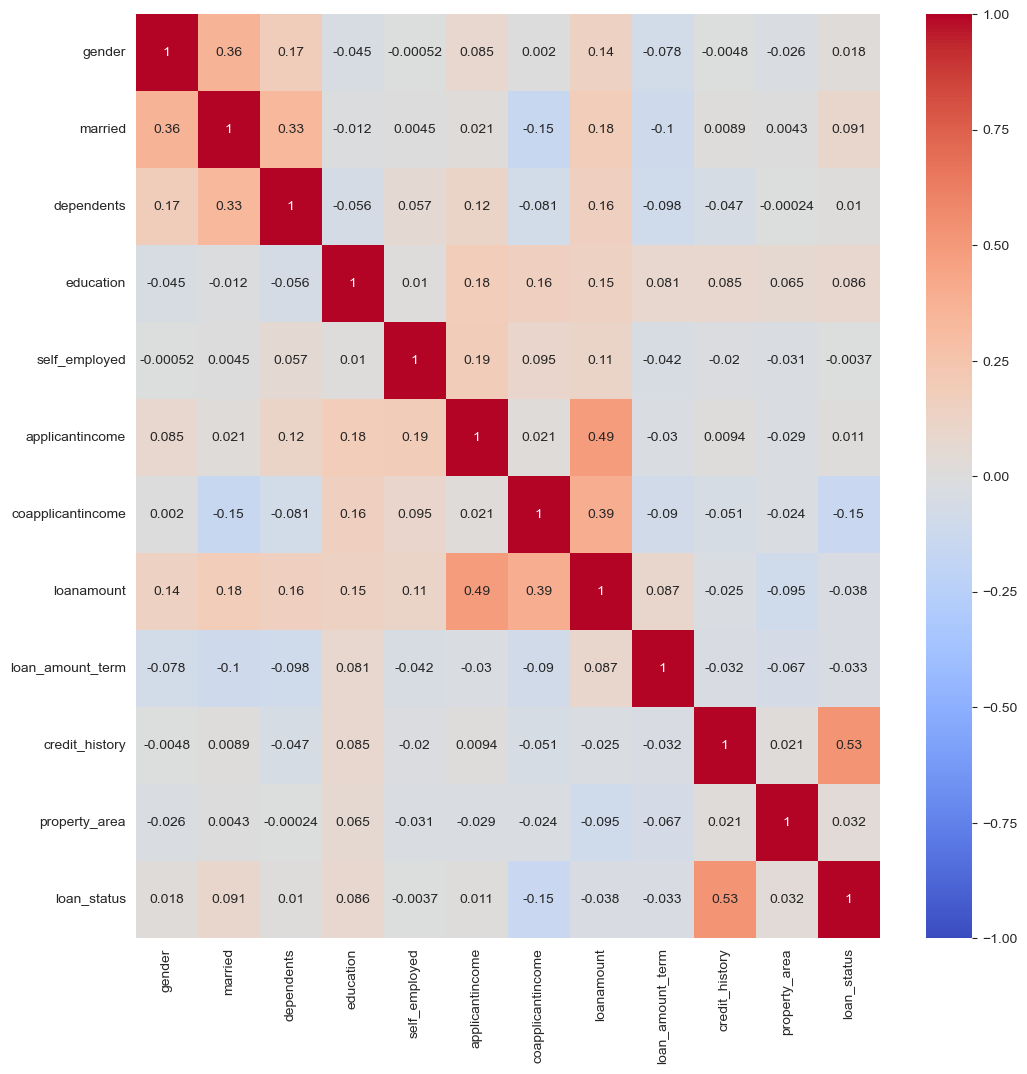

In [40]:
# creating a heatmap to show the correlation between features
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.show()

In [41]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
loan_id,,,,,,,,,,,,
LP001002,1,0,0,1,0,8.674026,-inf,4.852030,360.0,1.0,2,1
LP001003,1,1,1,1,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
LP001005,1,1,0,1,1,8.006368,-inf,4.189655,360.0,1.0,2,1
LP001006,1,1,0,0,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
LP001008,1,0,0,1,0,8.699515,-inf,4.948760,360.0,1.0,2,1


In [42]:
test_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
loan_id,,,,,,,,,,,
LP001015,1,1,0,1,0,8.651724,-inf,4.700480,360.0,1.0,2
LP001022,1,1,1,1,0,8.031385,7.313220,4.836282,360.0,1.0,2
LP001031,1,1,2,1,0,8.517193,7.495542,5.337538,360.0,1.0,2
LP001035,1,1,2,1,0,7.757906,7.842279,4.605170,360.0,1.0,2
LP001051,1,0,0,0,0,8.094378,-inf,4.356709,360.0,1.0,2


## Building the Model

Separating the dependent variable from the independent variables

In [43]:
#features = df.drop(['loan_amount_term', 'coapplicantincome', 'loan_status'], axis = 'columns')

In [44]:
#features.head()

In [45]:
#test_df.head()

In [46]:
features= [col for col in df._get_numeric_data().columns if col not in ['loan_status', 'coapplicantincome', 'loan_amount_term']]
X_train = df[features].values
y_train = df['loan_status'].values
variables = [col for col in test_df._get_numeric_data().columns if col not in ['loan_amount_term', 'coapplicantincome']]
X_test = test_df[variables].values

In [47]:
X_train[10]

array([1.        , 1.        , 2.        , 1.        , 0.        ,
       8.07090609, 4.24849524, 1.        , 2.        ])

In [48]:
X_test[10]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       8.03624994, 4.49980967, 1.        , 2.        ])

In [49]:
print("X df shape {}, test df shape {}".format(X_train.shape, X_test.shape))

X df shape (614, 9), test df shape (366, 9)


In [50]:
X_test = np.nan_to_num(X_test)

In [51]:
# Scaling the data
scaler = MinMaxScaler(feature_range = (0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Prediction

In [53]:
prediction = logreg.predict(X_test)

In [54]:
# Getting the coefficient of the model
print('Coefficient of model :', logreg.coef_)

Coefficient of model : [[-0.04799242  0.51531754  0.09205902  0.30523819  0.05211518  0.12909985
  -0.72668068  2.93230157  0.10133053]]


In [55]:
# Getting the intercept
print('Intercept of model', logreg.intercept_)

Intercept of model [-1.83625745]


In [56]:
# Getting the Accuracy Score on train dataset
score = logreg.score(X_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8061889250814332
accuracy_score percent : 80.62


In [57]:
# predict the target on the test dataset
prediction_test = logreg.predict(X_test)
print('Target on test data',prediction_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [58]:
# Performing a grid search of the model parameters to improve the model
# Defining the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

In [59]:
# Instantiating GridSearchCV 
grid_model = GridSearchCV(estimator= logreg, param_grid= param_grid, cv = 5)

# Fitting grid_model to the data
grid_model_result = grid_model.fit(X_train, y_train)

# Summarising the results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.806211 using {'max_iter': 100, 'tol': 0.01}


The model has an 80.6 accuracy. 